# Week 3: Chronic Kidney Disease Dataset Analysis
## Data Science for Biomedical Informatics

---

### Week 3 Mantra
> *"Every Column Tells a Story"*

---

In this notebook, we'll apply the **10-Point Inspection** to a real-world healthcare dataset focused on chronic kidney disease (CKD) prediction.

## Setup: Import Libraries and Load Data

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Import the essential libraries
import pandas as pd
import numpy as np

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

Libraries imported successfully!
pandas version: 2.3.3
numpy version: 2.0.2


In [3]:
# Load the Kidney Disease dataset
df = pd.read_csv('kidney_disease.csv')

print("Dataset loaded successfully!")

Dataset loaded successfully!


---

# The 10-Point Inspection

Like a pilot's pre-flight checklist, we go through each point methodically before taking off with our analysis.

| Point | What We Check | Command |
|-------|---------------|----------|
| 1 | Shape | `df.shape` |
| 2 | Columns | `df.columns` |
| 3 | Data Types | `df.dtypes` |
| 4 | First Look | `df.head()` |
| 5 | Last Look | `df.tail()` |
| 6 | Memory | `df.memory_usage()` |
| 7 | Missing | `df.isnull().sum()` |
| 8 | Duplicates | `df.duplicated()` |
| 9 | Statistics | `df.describe()` |
| 10 | Unique | `df.nunique()` |

---

## Point 1: Shape

**Question:** How big is our dataset?

The shape tells us:
- **Rows** = Number of observations (patients in our case)
- **Columns** = Number of features/variables

In [4]:
# Point 1: Shape
print("Dataset Shape:")
print(df.shape)

print(f"\n📊 We have {df.shape[0]:,} patients and {df.shape[1]} features")
print(f"📊 Total data points: {df.shape[0] * df.shape[1]:,}")

Dataset Shape:
(400, 26)

📊 We have 400 patients and 26 features
📊 Total data points: 10,400


- How many rows (observations)? 400
- How many columns (features)? 26
- What does each row represent in clinical terms? Each row represents one patient's clinical measurements and CKD diagnosis status.

---

## Point 2: Column Names

**Question:** What features do we have?

Understanding column names helps us:
- Know what data is available
- Identify potential issues (spaces, special characters)
- Start thinking about feature relationships

---

## Point 3: Data Types

**Question:** How is each column stored?

⚠️ **KEY INSIGHT:** Just because pandas says `int64` doesn't mean it should be treated as numeric!

In [5]:
# Point 2: Column Names
print("Column Names:")
print(df.columns.tolist())

print(f"\n📋 Total columns: {len(df.columns)}")

Column Names:
['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

📋 Total columns: 26


**Your Findings:**
- List all column names:
['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
- Which columns use medical abbreviations that might need further research to understand? All of them except id, age, bp, classification, and hemo need to be researched for me to understand. 

In [6]:
# Point 3: Data Types
print("Data Types:")
print(df.dtypes)

print("\n" + "="*50)
print("Data Type Summary:")
print(df.dtypes.value_counts())

Data Types:
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Data Type Summary:
object     14
float64    11
int64       1
Name: count, dtype: int64


- Which columns are numeric? id (int64), age, bp, sg, al, su, bgr, bu, sc, sod, pot, hemo (all float64)

- Which columns are categorical (object/string)?  rbc, pc, pcc, ba, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification

- Are there any data types that seem incorrect? (Hint: Look at columns that should be numeric but might be stored as objects) 
WC and RC are white blood cell count and red blood cell count. I think those should be numerical and I am curious why they are marked as objects. Was it a mistake? For grouping?

---

## Point 4: First Look (Head)

**Question:** What do the first few rows look like?

This helps us:
- See actual data values
- Spot obvious data quality issues
- Understand the data format

In [7]:
# Point 4: First Look
print("First 5 Rows:")
df.head()

First 5 Rows:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


- What do the actual values look like?  Numeric columns have decimal values, categorical columns have text, integer-like values and NaNs. There are values like normal/abnormal, yes/no, present/notpresent. Also, the first  patients are all classified as ckd

- Do you notice any unusual or unexpected values?
There are multiple NaN values in the first few rows which suggests there might be significant amounts of missing data.

- Are there any values that look like they might be placeholders for missing data?
I don't see any values that are cleaerly placeholders in this sample, but the NaNs are likely placeholders for missing data. Possibly patients who did not get their sod, pot, rc taken along with whatever other features have NaN in their rows outside of this head.

---

## Point 5: Last Look (Tail)

**Question:** What do the last few rows look like?

Why check the tail?
- Data might be sorted or ordered
- End of file might have different patterns
- Can reveal data entry issues

In [8]:
# Point 5: Last Look
print("Last 5 Rows:")
df.tail()

Last 5 Rows:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


- Does the data end cleanly?
Yes, the last rows have complete data. No missing data or NaNs


- Are the last rows consistent with the first rows? Yes, the columns have similar data formatting as their matching columns at the beginning. For example wc is still a number in the low thousands rouded to the nearest 100.  
- Do you notice any difference in the `classification` values between the beginning and end of the dataset?
Yes, now they are all notckd while at the beginning, they were all ckd. 


---

## Point 6: Memory Usage

**Question:** How much memory does our dataset use?

Important for:
- Knowing if data fits in RAM
- Planning for larger datasets
- Optimizing data types if needed

In [9]:
# Point 6: Memory Usage
print("Memory Usage by Column:")
print(df.memory_usage(deep=True))

# Total memory in MB
total_memory_mb = df.memory_usage(deep=True).sum() / 1e6
print(f"\n💾 Total Memory Usage: {total_memory_mb:.2f} MB")

Memory Usage by Column:
Index               128
id                 3200
age                3200
bp                 3200
sg                 3200
al                 3200
su                 3200
rbc               20582
pc                23337
pcc               26534
ba                26594
bgr                3200
bu                 3200
sc                 3200
sod                3200
pot                3200
hemo               3200
pcv               21710
wc                21422
rc                20347
htn               23693
dm                23689
cad               23582
appet             24371
pe                23649
ane               23633
classification    24452
dtype: int64

💾 Total Memory Usage: 0.37 MB


- How much memory does the dataset use? 370 KB
- Is this a "small" or "large" dataset by data science standards? This is small. This dataset can be loaded and processed very quickly.

---

## Point 7: Missing Values

**Question:** Do we have any missing data?

Missing data is crucial because:
- Many algorithms can't handle NaN values
- Missing patterns can be informative
- We may need imputation strategies

In [10]:
# Point 7: Missing Values
print("Missing Values by Column:")
missing = df.isnull().sum()
print(missing)

print("\n" + "="*50)
total_missing = missing.sum()
print(f"❓ Total Missing Values: {total_missing}")

if total_missing == 0:
    print("✅ Great! No missing values - complete dataset!")
else:
    print(f"⚠️ {total_missing} missing values need attention")

Missing Values by Column:
id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

❓ Total Missing Values: 1009
⚠️ 1009 missing values need attention


In [11]:
##Percent of missing Value in each row
##Count of missing values in each row/400. 
print("Missing value percentages:")
print((df.isnull().sum() / 400 * 100).round(1).sort_values(ascending=False))

Missing value percentages:
rbc               38.0
rc                32.5
wc                26.2
pot               22.0
sod               21.8
pcv               17.5
pc                16.2
hemo              13.0
su                12.2
sg                11.8
al                11.5
bgr               11.0
bu                 4.8
sc                 4.2
bp                 3.0
age                2.2
ba                 1.0
pcc                1.0
htn                0.5
dm                 0.5
cad                0.5
ane                0.2
appet              0.2
pe                 0.2
id                 0.0
classification     0.0
dtype: float64


- Which columns have the most missing values?
rbc, sod, pot, wc, rc 
- What percentage of each column is missing?
rbc (38%), rc(32.5%), wc(26.2%), pot(22.0%), sod(21.8%), pcv (17.5%), pc (16.2%), hemo(13.0%), su(12.2), sg(11.8%), al (11.5%), bgr (11.0%)
- ⚠️ **IMPORTANT:** This dataset has many columns with missing values. Which clinical measurements seem to have the most missing data? Why might certain lab tests be missing more often than others?
Clinical tests to get rbc (Red Blood Cells (urine)), white and red blood cell counts could require specialized lab work while blood pressure is something that is recorded often at the doctor.

---

## Point 8: Duplicate Rows

**Question:** Do we have any duplicate records?

Duplicates can:
- Inflate sample size artificially
- Bias statistical analyses
- Indicate data collection issues

In [12]:
# Point 8: Duplicates
duplicate_count = df.duplicated().sum()
duplicate_pct = (duplicate_count / len(df)) * 100

print(f"📑 Duplicate Rows: {duplicate_count:,}")
print(f"📑 Percentage: {duplicate_pct:.2f}%")

if duplicate_count > 0:
    print(f"\n⚠️ Warning: {duplicate_pct:.2f}% of rows are duplicates!")
    print("   This needs investigation in Week 4 (Data Cleaning)")

📑 Duplicate Rows: 0
📑 Percentage: 0.00%


In [13]:
# Let's look at some duplicate examples
print("Example of duplicate rows:")
duplicates = df[df.duplicated(keep=False)]
duplicates.head(10)

Example of duplicate rows:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


Are there any duplicate rows? No (0 duplicates)
Are all patient IDs unique? Yes. 400 unique IDs for 400 rows.

---

## Point 9: Descriptive Statistics

**Question:** What are the statistical properties of our numeric columns?

This tells us:
- Central tendency (mean, median)
- Spread (std, min, max)
- Distribution hints (quartiles)

In [14]:
# Point 9: Descriptive Statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**Your Findings:**
- What is the age range in the dataset? 2 yrs old to 90 yrs old
- What is the range of blood pressure (bp) values? 50 to 180_
- What is the range of hemoglobin (hemo) values? 3.1 to 17.8
- Do any min/max values seem impossible or clinically unlikely? While not a doctor, both the Potassium (pot) and Blood Glucose Random (bgr) maxes are much higher than even 75% percentile. The levels are so high, I am wondering if there was a data entry error. I am also unsure if those levels are even possible to survive. I looked it up and a potassium level above 6.5 is life-threatening, so 47 seems very unlikelyd. 

---

## Point 10: Unique Values

**Question:** How many unique values does each column have?

This reveals:
- Binary features (2 unique values)
- Categorical features (few unique values)
- Continuous features (many unique values)

In [15]:
# Transpose for easier reading
print("Descriptive Statistics (Transposed for readability):")
df.describe().T

Descriptive Statistics (Transposed for readability):


,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [16]:
# Point 10: Unique Values
print("Unique Values per Column:")
unique_counts = df.nunique().sort_values()
print(unique_counts)

Unique Values per Column:
ba                  2
ane                 2
appet               2
pe                  2
pcc                 2
pc                  2
htn                 2
rbc                 2
cad                 3
classification      3
sg                  5
dm                  5
su                  6
al                  6
bp                 10
sod                34
pot                40
pcv                44
rc                 49
age                76
sc                 84
wc                 92
hemo              115
bu                118
bgr               146
id                400
dtype: int64


In [17]:
# Categorize columns by unique count
print("\n" + "="*50)
print("Feature Classification by Unique Values:")
print("="*50)

binary = unique_counts[unique_counts == 2].index.tolist()
low_cardinality = unique_counts[(unique_counts > 2) & (unique_counts <= 5)].index.tolist()
high_cardinality = unique_counts[unique_counts > 5].index.tolist()

print(f"\n🟢 BINARY (2 values): {binary}")
print(f"\n🔵 LOW CARDINALITY (3-5 values): {low_cardinality}")
print(f"\n🟣 HIGH CARDINALITY (>5 values): {high_cardinality}")


Feature Classification by Unique Values:

🟢 BINARY (2 values): ['ba', 'ane', 'appet', 'pe', 'pcc', 'pc', 'htn', 'rbc']

🔵 LOW CARDINALITY (3-5 values): ['cad', 'classification', 'sg', 'dm']

🟣 HIGH CARDINALITY (>5 values): ['su', 'al', 'bp', 'sod', 'pot', 'pcv', 'rc', 'age', 'sc', 'wc', 'hemo', 'bu', 'bgr', 'id']


---

# Feature Classification Summary
**Your Findings:**
- Which columns have very few unique values (likely categorical)?
Ba, ane, appet, pe, pcc, pc, htn, rbc: All have 2 values only

cad, classification, sg, and dm: all have 3-5 values


- Which columns have many unique values (likely continuous or IDs)?

  ['su', 'al', 'bp', 'sod', 'pot', 'pcv', 'rc', 'age', 'sc', 'wc', 'hemo', 'bu', 'bgr', 'id']

- Does the number of unique IDs match the number of rows? Yes


I do think Age, BP, and Hemo Values will be good categories for grouping

---

# Sanity Checks

**Question:** Do our values make real-world sense?

In [18]:
# Sanity Checks
print("🔍 SANITY CHECKS")
print("="*50)

# TODO: Update these checks based on the kidney disease features
# Example checks - modify based on actual columns
checks = [
    # ('Feature Name', 'column_name', expected_min, expected_max, 'Description'),
]

all_passed = True
for name, col, expected_min, expected_max, note in checks:
    actual_min = df[col].min()
    actual_max = df[col].max()
    
    passed = (actual_min >= expected_min - 5) and (actual_max <= expected_max + 5)
    status = "✅" if passed else "❌"
    
    print(f"\n{status} {name}:")
    print(f"   Range: {actual_min} to {actual_max}")
    print(f"   Note: {note}")
    
    if not passed:
        all_passed = False

print("\n" + "="*50)
if all_passed:
    print("✅ ALL SANITY CHECKS PASSED!")
    print("   Data is internally consistent with real-world expectations")
else:
    print("⚠️ Some checks failed - investigate further!")

🔍 SANITY CHECKS

✅ ALL SANITY CHECKS PASSED!
   Data is internally consistent with real-world expectations


---

# Quick Info Summary

pandas provides a convenient `info()` method that combines several inspection points:

In [19]:
# Bonus: df.info() provides a quick summary
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295

---

# Reusable 10-Point Inspection Function

Here's a function you can reuse for any dataset:

In [20]:
def ten_point_inspection(df, name="Dataset"):
    """
    Perform a comprehensive 10-point inspection on a DataFrame.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataset to inspect
    name : str
        Name of the dataset for display purposes
    """
    print("="*60)
    print(f"📊 10-POINT INSPECTION: {name}")
    print("="*60)
    
    # 1. Shape
    print(f"\n1️⃣  SHAPE: {df.shape[0]:,} rows × {df.shape[1]} columns")
    
    # 2. Columns
    print(f"\n2️⃣  COLUMNS: {list(df.columns)}")
    
    # 3. Data Types
    print(f"\n3️⃣  DATA TYPES:")
    print(df.dtypes.value_counts().to_string())
    
    # 4 & 5. First and Last rows (just noting)
    print(f"\n4️⃣  FIRST ROW: {dict(df.iloc[0])}")
    print(f"\n5️⃣  LAST ROW: {dict(df.iloc[-1])}")
    
    # 6. Memory
    memory_mb = df.memory_usage(deep=True).sum() / 1e6
    print(f"\n6️⃣  MEMORY: {memory_mb:.2f} MB")
    
    # 7. Missing Values
    missing = df.isnull().sum().sum()
    print(f"\n7️⃣  MISSING VALUES: {missing:,}")
    
    # 8. Duplicates
    dupes = df.duplicated().sum()
    dupe_pct = (dupes / len(df)) * 100
    print(f"\n8️⃣  DUPLICATES: {dupes:,} ({dupe_pct:.2f}%)")
    
    # 9. Key Statistics
    print(f"\n9️⃣  KEY STATISTICS:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns[:5]  # First 5 numeric
    for col in numeric_cols:
        print(f"    {col}: min={df[col].min()}, max={df[col].max()}, mean={df[col].mean():.2f}")
    
    # 10. Unique Values
    print(f"\n🔟 UNIQUE VALUE RANGES:")
    unique = df.nunique()
    print(f"    Binary (2): {list(unique[unique == 2].index)}")
    print(f"    Low (3-5): {list(unique[(unique > 2) & (unique <= 5)].index)}")
    print(f"    High (>5): {list(unique[unique > 5].index)}")
    
    print("\n" + "="*60)
    print("✅ 10-Point Inspection Complete!")
    print("="*60)

In [21]:
# Run the inspection function
ten_point_inspection(df, "Chronic Kidney Disease")

📊 10-POINT INSPECTION: Chronic Kidney Disease

1️⃣  SHAPE: 400 rows × 26 columns

2️⃣  COLUMNS: ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

3️⃣  DATA TYPES:
object     14
float64    11
int64       1

4️⃣  FIRST ROW: {'id': np.int64(0), 'age': np.float64(48.0), 'bp': np.float64(80.0), 'sg': np.float64(1.02), 'al': np.float64(1.0), 'su': np.float64(0.0), 'rbc': nan, 'pc': 'normal', 'pcc': 'notpresent', 'ba': 'notpresent', 'bgr': np.float64(121.0), 'bu': np.float64(36.0), 'sc': np.float64(1.2), 'sod': np.float64(nan), 'pot': np.float64(nan), 'hemo': np.float64(15.4), 'pcv': '44', 'wc': '7800', 'rc': '5.2', 'htn': 'yes', 'dm': 'yes', 'cad': 'no', 'appet': 'good', 'pe': 'no', 'ane': 'no', 'classification': 'ckd'}

5️⃣  LAST ROW: {'id': np.int64(399), 'age': np.float64(58.0), 'bp': np.float64(80.0), 'sg': np.float64(1.025), 'al': np.float64(0.0), 'su': 

### 10 Point Inspection Conclusion 



# PART 2: Data Dictionary 

  This dataset contains 400 unique patients across 26 clinical features, with a small  
  memory footprint of 0.37 MB and no duplicate rows. The most notable data
  quality issue is the 1,009 total missing values, with columns like rbc (38%), 
  rc (32.5%), and wc (26.3%) having the highest missingness. Several
  columns (pcv, wc, rc) are stored as objects instead of numeric types. The dataset appears
  sorted by classification, with CKD patients listed first. There appear to be some data entry errors as well, with some maximum values being well above the 75% standard deviation.


# Part 2: Data Dictionary (20 points)

In [22]:
###Research for Data Dictionary.

print("Data Types:")                                                          
print(df.dtypes)                                                              
print()        
print("Missing Values:")                                                      
print(df.isnull().sum())                                                      
print()
print("Value ranges per column:")
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        print(f"{col}: {df[col].min()} to {df[col].max()}")
    else:
        print(f"{col}: {df[col].value_counts(dropna=False).to_dict()}")

Data Types:
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Missing Values:
id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc               

---



Complete the following data dictionary. For each column, you must:
1. **Research** the clinical meaning (many columns use medical abbreviations)
2. **Identify** the feature type (Continuous, Discrete, Categorical-Nominal, Categorical-Ordinal, Binary, Identifier)
3. **Document** the valid values/range you observe
4. **Note** any issues or questions

| Column | Full Name / Description | Feature Type | Valid Values/Range | Notes/Issues |
|--------|------------------------|--------------|-------------------|--------------|
| `id` | Patient Identifier | Identifier | 0–399 (integer) | 400 unique IDs, one per patient |
| `age` | Age of patient (years) | Continuous | 2.0–90.0 | 9 missing values; wide range includes pediatric and elderly patients |
| `bp` | Blood Pressure – diastolic (mm Hg) | Continuous | 50.0–180.0 | 12 missing; these are diastolic readings, not systolic |
| `sg` | Specific Gravity (urine) | Categorical-Ordinal | 1.005, 1.010, 1.015, 1.020, 1.025 | 47 missing; measures urine concentrations| 
| `al` | Albumin (urine) | Categorical-Ordinal | 0, 1, 2, 3, 4, 5 | 46 missing; graded scale of albumin presence in urine |
| `su` | Sugar (urine) | Categorical-Ordinal | 0, 1, 2, 3, 4, 5 | 49 missing; graded scale of sugar presence in urine |
| `rbc` | Red Blood Cells (urine) | Categorical-Nominal | normal, abnormal | 152 missing (38%); highest missingness in dataset |
| `pc` | Pus Cells (urine) | Categorical-Nominal | normal, abnormal | 65 missing; indicates urinary tract infection or inflammation |
| `pcc` | Pus Cell Clumps | Binary | present, notpresent | 4 missing; clumping suggests active infection |
| `ba` | Bacteria | Binary | present, notpresent | 4 missing; indicates bacterial infection in urine |
| `bgr` | Blood Glucose Random (mg/dL) | Continuous | 22.0–490.0 | 44 missing; very high values likely reflect uncontrolled diabetes |
| `bu` | Blood Urea (mg/dL) | Continuous | 1.5–391.0 | 19 missing; elevated levels indicate impaired kidney filtration |
| `sc` | Serum Creatinine (mg/dL) | Continuous | 0.4–76.0 | 17 missing; max of 76.0 is extremely high, possible outlier or severe CKD |
| `sod` | Sodium (mEq/L) | Continuous | 4.5–163.0 | 87 missing; min of 4.5 is likely a data entry error (normal ~135–145) |
| `pot` | Potassium (mEq/L) | Continuous | 2.5–47.0 | 88 missing; max of 47.0 is very high, could be data error or severe case |
| `hemo` | Hemoglobin (g/dL) | Continuous | 3.1–17.8 | 52 missing |
| `pcv` | Packed Cell Volume (%) | Continuous | 9–54 | 70 missing; some cells contain `?` or tab characters that need cleaning |
| `wc` | White Blood Cell Count (cells/cumm) | Continuous | 2200–26400 | 105 missing; some `?` values and tab characters present |
| `rc` | Red Blood Cell Count (millions/cmm) | Continuous | 2.1–8.0 | 130 missing (32.5%); some `?` values need to be treated as NaN |
| `htn` | Hypertension | Binary | yes, no | 2 missing; whether the patient has hypertension |
| `dm` | Diabetes Mellitus | Binary | yes, no | 2 missing; has tab/space issues (e.g. `\tno`, `\tyes`, ` yes`) that need stripping |
| `cad` | Coronary Artery Disease | Binary | yes, no | 2 missing; some values have leading tab characters |
| `appet` | Appetite | Binary | good, poor | 1 missing; self-reported appetite status |
| `pe` | Pedal Edema | Binary | yes, no | 1 missing; swelling in ankles |
| `ane` | Anemia | Binary | yes, no | 1 missing; low red blood cell / hemoglobin levels |
| `classification` | CKD Diagnosis | Binary | ckd, notckd | 248 ckd vs 150 notckd;

In [23]:
# Code to support the data dictionary — explore unique values and ranges
print("=== Unique values for categorical columns ===")
print()
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
for col in cat_cols:
    print(f"{col}: {df[col].value_counts(dropna=False).to_dict()}")

print()
print("=== Ranges for numeric columns ===")
print()
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
for col in num_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, missing={df[col].isnull().sum()}")

print()
print("=== Columns stored as object that may need cleaning ===")
print("pcv unique:", df['pcv'].unique())
print("wc unique:", df['wc'].unique())
print("rc unique:", df['rc'].unique())

=== Unique values for categorical columns ===

rbc: {'normal': 201, nan: 152, 'abnormal': 47}
pc: {'normal': 259, 'abnormal': 76, nan: 65}
pcc: {'notpresent': 354, 'present': 42, nan: 4}
ba: {'notpresent': 374, 'present': 22, nan: 4}
htn: {'no': 251, 'yes': 147, nan: 2}
dm: {'no': 258, 'yes': 134, '\tno': 3, '\tyes': 2, nan: 2, ' yes': 1}
cad: {'no': 362, 'yes': 34, '\tno': 2, nan: 2}
appet: {'good': 317, 'poor': 82, nan: 1}
pe: {'no': 323, 'yes': 76, nan: 1}
ane: {'no': 339, 'yes': 60, nan: 1}
classification: {'ckd': 248, 'notckd': 150, 'ckd\t': 2}

=== Ranges for numeric columns ===

age: min=2.0, max=90.0, missing=9
bp: min=50.0, max=180.0, missing=12
sg: min=1.005, max=1.025, missing=47
al: min=0.0, max=5.0, missing=46
su: min=0.0, max=5.0, missing=49
bgr: min=22.0, max=490.0, missing=44
bu: min=1.5, max=391.0, missing=19
sc: min=0.4, max=76.0, missing=17
sod: min=4.5, max=163.0, missing=87
pot: min=2.5, max=47.0, missing=88
hemo: min=3.1, max=17.8, missing=52

=== Columns stored a

### Clinical Research Questions for Version B

Answer these questions based on your research (you may need to use Google):

**1. What is blood urea (bu) and why is it important for kidney function? What are normal vs. elevated levels?**

Blood urea is a waste product from protein breakdown that the kidneys filter out of the blood. Normal levels are around 7–20 mg/dL, and when levels get higher than that it usually means the kidneys aren't filtering waste properly, which is why doctors use it as a key marker of kidney function.

---

**2. What is the relationship between hypertension (htn) and chronic kidney disease? Can hypertension cause CKD, or does CKD cause hypertension, or both?**

It goes both ways: high blood pressure damages the small blood vessels in the kidneys over time which can lead to CKD, but damaged kidneys also can't regulate fluid and salt balance well, which pushes blood pressure up even more. So they feed into each other in a vicious cycle, and controlling blood pressure is one of the main ways to slow CKD progression.

---

**3. Why is albumin in urine (al) a warning sign for kidney disease? What is albuminuria and what does it indicate?**

Albumin is a protein that normally stays in the blood because healthy kidney filters are too fine to let it through, so finding albumin in the urine (albuminuria) means those filters are damaged. It's actually one of the earliest detectable signs that kidney function is declining, even before other symptoms appear.

---

**4. What is pedal edema (pe) and why might it be present in kidney disease patients? How is it related to kidney function?**

Pedal edema is swelling in the feet and ankles from fluid buildup in the tissues. When the kidneys aren't working properly they can't remove excess sodium and water, so that extra fluid pools in the lower extremities because of gravity.

---

## Part 3: Data Validation (15 points)

### 3.1 Age Validation (5 points)

Write code to check:
- How many ages are below 0?
- How many ages are above 120?
- What is the actual age range?
- How is age distributed across the dataset?

In [24]:
# 3.1 Age Validation
print("Age Validation")
print("=" * 40)
print(f"Ages below 0: {(df['age'] < 0).sum()}")
print(f"Ages above 120: {(df['age'] > 120).sum()}")
print(f"Actual age range: {df['age'].min()} to {df['age'].max()}")
print(f"Missing age values: {df['age'].isnull().sum()}")
print()
print("Age distribution (binned):")
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print(df['age_group'].value_counts().sort_index())
print()
print("Basic age statistics:")
print(df['age'].describe())

Age Validation
Ages below 0: 0
Ages above 120: 0
Actual age range: 2.0 to 90.0
Missing age values: 9

Age distribution (binned):
age_group
0-17      19
18-29     25
30-44     70
45-59    126
60-74    131
75+       20
Name: count, dtype: int64

Basic age statistics:
count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64


**Your Findings:**

- **Are there any impossible age values?** No. The range is 2 to 90 which is all plausible.

- **What is the most common age range of patients in this dataset?** The 45–59 and 60–74 age groups have the most patients, which makes sense since CKD is more common in middle-aged and older adults.

- **Does the age distribution make clinical sense for a kidney disease dataset?** Yes. CKD prevalence increases with age, so it's expected that the dataset skews toward older patients.

In [25]:


### 3.2 Blood Urea (bu) Validation (5 points)

#Blood urea nitrogen is a key indicator of kidney function. Normal range is typically 7-20 mg/dL.

#Write code to examine blood urea values closely.

In [26]:
# 3.2 Blood Urea Validation
print("Blood Urea (bu) Validation:")
print(f"Range: {df['bu'].min()} to {df['bu'].max()} mg/dL")
print(f"Missing values: {df['bu'].isnull().sum()}")
print(f"Mean: {df['bu'].mean():.2f} mg/dL")
print(f"Median: {df['bu'].median():.2f} mg/dL")
print()
print(f"Patients with bu > 100 mg/dL (extremely elevated): {(df['bu'] > 100).sum()}")
print(f"Patients with bu in normal range (7-20 mg/dL): {((df['bu'] >= 7) & (df['bu'] <= 20)).sum()}")
print()
print("Blood urea statistics:")
print(df['bu'].describe())

Blood Urea (bu) Validation:
Range: 1.5 to 391.0 mg/dL
Missing values: 19
Mean: 57.43 mg/dL
Median: 42.00 mg/dL

Patients with bu > 100 mg/dL (extremely elevated): 51
Patients with bu in normal range (7-20 mg/dL): 52

Blood urea statistics:
count    381.000000
mean      57.425722
std       50.503006
min        1.500000
25%       27.000000
50%       42.000000
75%       66.000000
max      391.000000
Name: bu, dtype: float64


- What is the range of blood urea values in this dataset?
1.5 to 391.0 mg/dL

- How many patients have extremely elevated blood urea (>100 mg/dL)?
51

- What might extremely high blood urea values indicate clinically? Very high blood urea typically indicates severe kidney impairment where the kidneys can barely filter waste, and could mean the patient is approaching or already in kidney failure.

- Are there any missing values? How might you handle them? There are 19 missing values. You could drop those rows for analyses involving bu, or impute them using the median (since the mean is skewed by those high values)

---

### 3.3 Classification Target Variable Validation (5 points)

Write code to see all unique values and their counts for the classification column.

In [27]:
# 3.3 Classification Validation

print("Classification column. BEFORE cleaning:")
print(df['classification'].value_counts(dropna=False))
print()
print("Unique values (with repr to show hidden characters):")
for val in df['classification'].unique():
    print(f"  {repr(val)}")

# Clean the classification column
df['classification'] = df['classification'].str.strip()

print()
print("Classification column — AFTER cleaning:")
print(df['classification'].value_counts(dropna=False))

Classification column. BEFORE cleaning:
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

Unique values (with repr to show hidden characters):
  'ckd'
  'ckd\t'
  'notckd'

Classification column — AFTER cleaning:
classification
ckd       250
notckd    150
Name: count, dtype: int64


2 entries were stored as "ckd" + a hidden character or whitespace. str.strip removes that whitespace so those 2 join the rest of the other ckds. The reason that it says that CKD before and after are both 250 is because I ran this code multiple times and it stripped the whitespace the first time I ran the code. 


  - What are all the possible classification values? Before cleaning there were 
  three: ckd, ckd\t (with a hidden tab), and notckd. After cleaning it's just
  ckd and notckd.                                                               
  - Are there any data quality issues? Yeah, 2 entries had a trailing tab
  character on ckd which made them look like a separate category. Using
  .str.strip() fixed that.
  - How many patients have CKD vs. do not have CKD? 250 have CKD and 150 do not.
  - Is the dataset balanced or imbalanced? It's imbalanced — 62.5% CKD vs 37.5%
  not CKD, so there are about 1.7x more CKD patients.



---

## Part 4: Create Clinical Blood Pressure Groups (10 points)

Create a new column called `bp_category` that categorizes patients into clinically-meaningful blood pressure groups.

### Version B: Blood Pressure Classification

Use these categories based on American Heart Association guidelines:

| BP Category | Range (mm Hg) | Clinical Rationale |
|-------------|---------------|-------------------|
| Low | <70 | Hypotension, may indicate other health issues |
| Normal | 70-79 | Healthy blood pressure range |
| Elevated | 80-89 | Elevated, lifestyle changes recommended |
| High Stage 1 | 90-99 | Hypertension Stage 1, medication may be needed |
| High Stage 2 | 100+ | Hypertension Stage 2, requires treatment |

**Note:** This dataset uses diastolic blood pressure values. Normal classification systems typically use systolic, but we'll work with what's available.

In [28]:
# Create bp_category column using a custom function
def classify_bp(bp):
    if pd.isna(bp):
        return np.nan
    elif bp < 70:
        return 'Low'
    elif bp < 80:
        return 'Normal'
    elif bp < 90:
        return 'Elevated'
    elif bp < 100:
        return 'High Stage 1'
    else:
        return 'High Stage 2'

df['bp_category'] = df['bp'].apply(classify_bp)

In [29]:
# Show counts per blood pressure category
print("Patients per blood pressure category:")
print(df['bp_category'].value_counts(dropna=False))

Patients per blood pressure category:
bp_category
Elevated        116
Normal          112
Low              76
High Stage 1     53
High Stage 2     31
NaN              12
Name: count, dtype: int64


In [30]:
# Calculate CKD rate by blood pressure category
#recheck amount of categories
for val in df['classification'].unique():
    print(f"  {repr(val)}")

    
df['is_ckd'] = (df['classification'] == 'ckd').astype(int)

bp_ckd = df.groupby('bp_category')['is_ckd'].agg(['sum', 'count', 'mean'])
bp_ckd.columns = ['CKD_count', 'Total', 'CKD_rate']
bp_ckd['CKD_rate_pct'] = (bp_ckd['CKD_rate'] * 100).round(1)
#converts to percentage
# Reorder by clinical severity
order = ['Low', 'Normal', 'Elevated', 'High Stage 1', 'High Stage 2']
bp_ckd = bp_ckd.reindex(order)

print("CKD rate by blood pressure category:")
print(bp_ckd[['CKD_count', 'Total', 'CKD_rate_pct']])

  'ckd'
  'notckd'
CKD rate by blood pressure category:
              CKD_count  Total  CKD_rate_pct
bp_category                                 
Low                  31     76          40.8
Normal               74    112          66.1
Elevated             51    116          44.0
High Stage 1         53     53         100.0
High Stage 2         31     31         100.0


### Analysis Questions: ###

1. How many patients are in each blood pressure category?

116 in elevated, 112, in normal, 76 in low, 53 in high stage 1, 31 in high stage 2, and 12 not in a category.


2. What is the CKD rate (percentage) for each blood pressure category?

44% in elevated, 66.1% in normal, 40.8% in low, 100% in both High Stage 1 and High Stage 2.
   
3. Is there a relationship between blood pressure and CKD prevalence? Does this match what you learned in your clinical research?

Your answer:  Yes! This positive correlation shows that the higher the patients blood pressure is, the more likely they are to have chronic kidney disease. The High Stage blood pressure patients have a 100% rate of CKD Rate. And Low has the  a 40.8% rate of CKD. However, while it is a positive relationship, it is not linear that could indicate that the correlation is not always positive. For example, the Elevated BP Stage has a lower CKD rate than a normal BP. This tells me that there are other factors indicating CKD rate.      




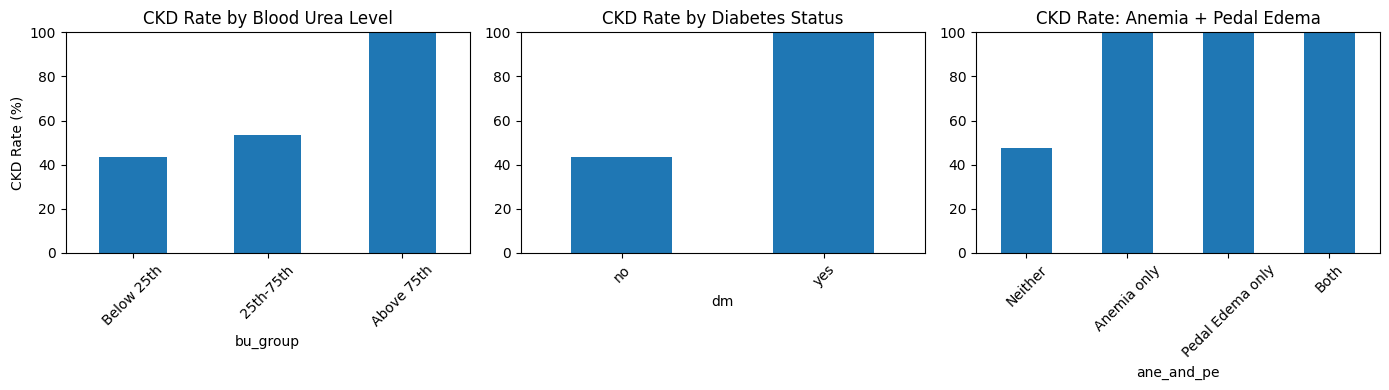

                 is_ckd                
                    sum count      mean
ane_and_pe                             
Anemia only          37    37  1.000000
Both                 23    23  1.000000
Neither             137   287  0.477352
Pedal Edema only     53    53  1.000000


In [31]:
  %matplotlib inline                                                            
  import matplotlib.pyplot as plt                                               

  # Clean columns
  df['classification'] = df['classification'].str.strip()
  df['dm'] = df['dm'].str.strip()
  df['ane'] = df['ane'].str.strip()
  df['pe'] = df['pe'].str.strip()

  # Recreate is_ckd in case it's missing
  df['is_ckd'] = (df['classification'] == 'ckd').astype(int)

  # Q1: Blood urea by percentile vs CKD
  bu_75 = df['bu'].quantile(0.75)
  bu_25 = df['bu'].quantile(0.25)
  df['bu_group'] = pd.cut(df['bu'], bins=[-float('inf'), bu_25, bu_75,
  float('inf')],
                          labels=['Below 25th', '25th-75th', 'Above 75th'])

  # Q3: Anemia + Pedal Edema combo
  df['ane_and_pe'] = 'Neither'
  df.loc[(df['ane'] == 'yes') & (df['pe'] != 'yes'), 'ane_and_pe'] = 'Anemia only'
  df.loc[(df['ane'] != 'yes') & (df['pe'] == 'yes'), 'ane_and_pe'] = 'Pedal Edema only'
  df.loc[(df['ane'] == 'yes') & (df['pe'] == 'yes'), 'ane_and_pe'] = 'Both'

  fig, axes = plt.subplots(1, 3, figsize=(14, 4))

  df.groupby('bu_group',
  observed=True)['is_ckd'].mean().mul(100).plot(kind='bar', ax=axes[0])
  axes[0].set_title('CKD Rate by Blood Urea Level')
  axes[0].set_ylabel('CKD Rate (%)')

  df.groupby('dm', observed=True)['is_ckd'].mean().mul(100).reindex(['no','yes']
  ).plot(kind='bar', ax=axes[1])
  axes[1].set_title('CKD Rate by Diabetes Status')

  df.groupby('ane_and_pe',
  observed=True)['is_ckd'].mean().mul(100).reindex(['Neither','Anemia only','Pedal Edema only','Both']).plot(kind='bar', ax=axes[2])
  axes[2].set_title('CKD Rate: Anemia + Pedal Edema')

  for ax in axes:
      ax.set_ylim(0, 100)
      ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.show()
  print(df.groupby('ane_and_pe')[['is_ckd']].agg(['sum','count','mean']))



###Claude used to create the plots. 

## Part 5: Research Questions (15 points)

### 5.1 Write Three Answerable Questions (9 points)

Write three questions that THIS dataset can answer. Remember: the data can show relationships and patterns, but cannot prove causation.

**Your questions must explore these specific areas:**

1. **A question about blood urea levels and CKD:**
Do patients above the 75% percentile level of blood urea have a significantly higher rate of CKD diagnoses compared with patients within or below 25% percentile?

---

2. **A question comparing patients with diabetes vs. without diabetes:**
Do patients diagnosed with diabetes have higher rates of CKD than patients without diabetes?

---

3. **A question about the combination of anemia AND pedal edema:**
Do patients with both anemia and pedal edema have a higher rate of CKD diagnoses than patients with just one of the conditions?

---


### 5.2 Identify One Question the Data CANNOT Answer (3 points)

Write one question about **disease progression or outcomes over time** that this dataset cannot answer, and explain why.

**Question:** How quickly does kidney function decline in patients diagnosed with high BP levels compared to patients diagnosed with low BP levels?


**Why it cannot be answered with this data:**
We have no time series data. We only know the medical information of the patients at one specific point, and there is no indication at the level of kidney failure that the patients are at in this dataset.

---


In [32]:

### 5.3 Grouping Analysis (3 points)

##Answer this question using a groupby analysis:
##(Note: You'll need to handle missing values and clean the classification column first!)

##Your Code:##
df['classification'] = df['classification'].str.strip()
bu_clean = df.dropna(subset=['bu'])                                           
                 
bu_by_ckd = bu_clean.groupby('classification')['bu'].mean().round(2)          
print("Average blood urea (mg/dL) by CKD status:")                            
print(bu_by_ckd)



Average blood urea (mg/dL) by CKD status:
classification
ckd       72.39
notckd    32.80
Name: bu, dtype: float64


##"What is the average blood urea level for patients with CKD vs. patients without CKD?"**
The average Bu level for CKD patients is 72.39 (mg/dL), and for patients without CKD, the bu is 32.80 mg/dL.




**Your Interpretation:**

What is the difference in average blood urea between CKD and non-CKD patients? Why does this make clinical sense?
CKD patients have a much higher chance of having high blood urea levels than non-CKD patients. This makes clinical sense to me because kidneys filter waste products. CKD means that the kidneys are not filtering properly. Blood urea is a waste product that the kidneys filter out of blood and into urine, so when the kidneys are not working, it makes sense that patients would have a higher level of urea still in their blood.  

---

CKD vs Non-CKD:
classification
ckd       250
notckd    150
Name: count, dtype: int64

Percentages:
classification
ckd       62.5
notckd    37.5
Name: proportion, dtype: float64


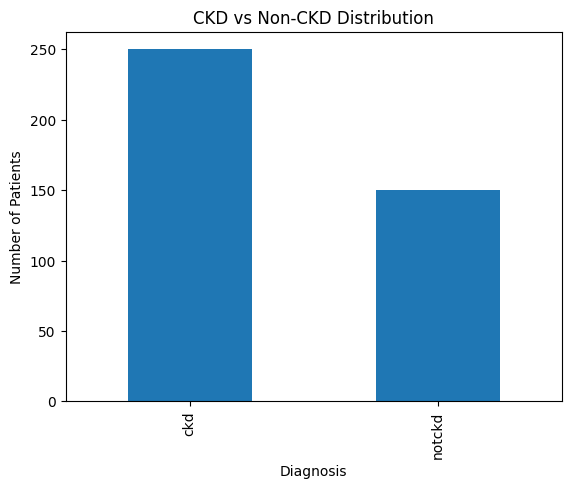

In [33]:

## Part 6: Target Variable Analysis (Bonus - 5 points)

##The `classification` column is our **target variable** - what we're trying to predict. Analyze its distribution.

##Your Code:**
df['classification'] = df['classification'].str.strip()
                                                                                
  # Count and percentage
counts = df['classification'].value_counts()                                  
pcts = df['classification'].value_counts(normalize=True).mul(100).round(1)
##divides count by 400 on both sides


print("CKD vs Non-CKD:")
print(counts)
print()
print("Percentages:")
print(pcts)

df['classification'].value_counts().plot(kind='bar')
plt.title('CKD vs Non-CKD Distribution')                                      
plt.ylabel('Number of Patients')
plt.xlabel('Diagnosis')
plt.show()

# Show the count and percentage of CKD vs non-CKD
# Make sure to clean any data quality issues first!





### Bonus Questions:

**1. What percentage of patients in this dataset have CKD?**

62.5% of patients in this dataset have CKD.


**2. Is this dataset balanced or imbalanced?**

Imbalanced. There are about 1.7x more patients with CKD than without CKD which is clearly not a 50/50 split.


**3. Why does class imbalance matter for machine learning? (You may need to research this)**

Your answer: When one class is more common, the model can learn to be accurate just by guessing the more common class rather than learn the nuanced patterns. This means that the reported accuracy could be wrong, and that the analyst should use tools like recall, weighting, and thresholds to counter the effects of the imbalance.

---

**4. In the real world, would you expect CKD rates to be this high or this low? What might this tell you about how this dataset was collected?**

Your answer: I would not expect them to be this high. This tells me that the data could have been collected at a health care facility specializing in kidney treatment or a related condition. Not a simple random sample of the population. I also found that the average rate of CKD is 15% in the population, much lower than 62.5% 

---
